In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
m=pd.read_csv('International_Education_Costs.csv')

In [22]:
print(m)

          Country        City                      University  \
0             USA   Cambridge              Harvard University   
1              UK      London         Imperial College London   
2          Canada     Toronto           University of Toronto   
3       Australia   Melbourne         University of Melbourne   
4         Germany      Munich  Technical University of Munich   
..            ...         ...                             ...   
902        France  Strasbourg        University of Strasbourg   
903      Malaysia       Nilai                            USIM   
904  Saudi Arabia     Al-Ahsa          King Faisal University   
905           USA     Seattle        University of Washington   
906            UK  Nottingham        University of Nottingham   

                    Program     Level  Duration_Years  Tuition_USD  \
0          Computer Science    Master             2.0        55400   
1              Data Science    Master             1.0        41200   
2        

In [23]:
m.isnull()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,False,False,False
903,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
numeric_m = m.select_dtypes(include=['number'])

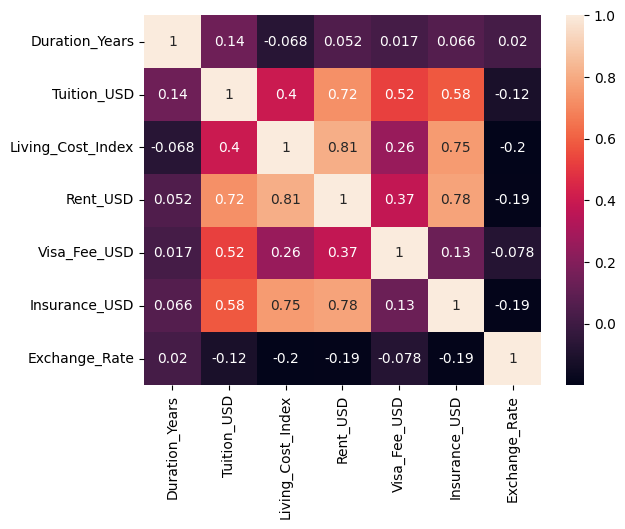

In [25]:
sns.heatmap(numeric_m.corr(), annot=True)
plt.show()

<Axes: >

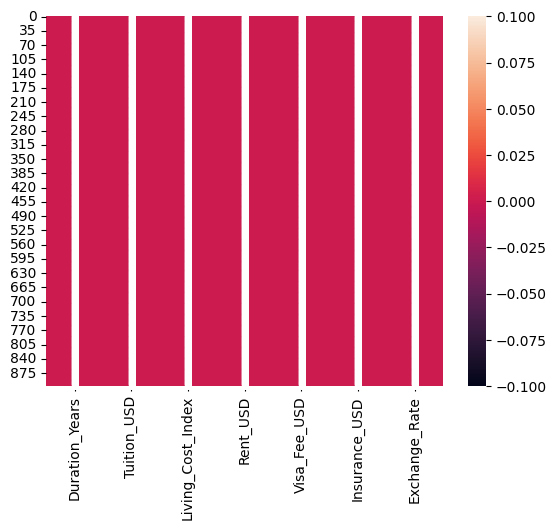

In [26]:
sns.heatmap(numeric_m.isnull(), annot=True)

In [27]:
X = m[['Duration_Years', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']]
y = m['Tuition_USD']


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=reg.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.6955053846603187
MAE: 6686.347654893431
MSE: 82388217.00500283


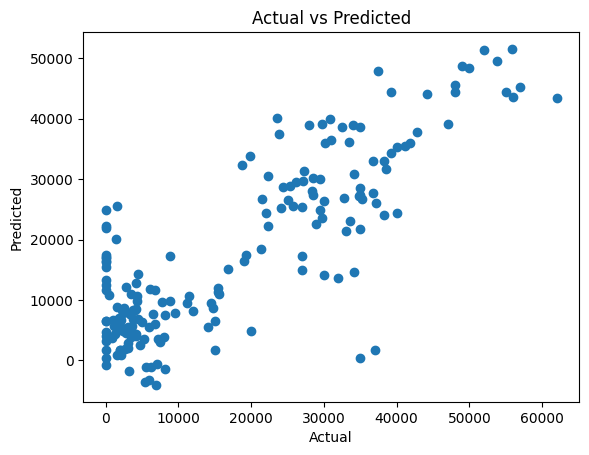

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()